<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final project - Programing For Data Science
</div>

## **Thông tin nhóm**

#### Thành viên 1:
* **Họ và tên:** Võ Duy Anh
* **MSSV:** 21127221

#### Thành viên 2:
* **Họ và tên:** Nguyễn Mậu Gia Bảo
* **MSSV:** 21127583

## **Thông tin đồ án**

### **Nội dung**
1. Thu thập dữ liệu
2. Khám phá dữ liệu
3. Đặt câu hỏi có ý nghĩa
4. Tiền xử lý + phân tích dữ liệu để trả lời từng câu hỏi
5. Nhìn lại quá trình làm đồ án
6. Tài liệu tham khảo

### **Thư viện hỗ trợ**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import numpy as np

from geopy.geocoders import Nominatim
import pypopulation
from babel import Locale
from langcodes import Language

### **1. Thu thập dữ liệu**

#### 📌 What subject is your data about? What is the source of your data?

#### 📌 Do authors of this data allow you to use like this? You can check the data license

#### 📌 How did authors collect data?

### **2. Khám phá dữ liệu**

#### Đọc dữ liệu từ file

In [2]:
data = pd.read_csv("Global YouTube Statistics.csv",encoding='ISO-8859-1')
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


#### 📌 Dữ liệu có bao nhiêu hàng và bao nhiêu cột?

In [3]:
shape = data.shape
print(f"Kích thước dữ liệu hiện tại: {shape}")

Kích thước dữ liệu hiện tại: (995, 28)


In [4]:
row,col = data.shape
print(f'Dữ liệu có {row} hàng và {col} cột')

Dữ liệu có 995 hàng và 28 cột


#### 📌 Ý nghĩa của mỗi hàng là gì?

Mỗi dòng chứa thông tin của 1 kênh Youtube 

####  📌 Dữ liệu có các dòng bị lặp không?

In [5]:
index = data.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

In [6]:
# TEST
if num_duplicated_rows == 0:
    print(f"Dữ liệu không có dòng bị trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng bị lặp")

Dữ liệu không có dòng bị trùng lặp!


#### 📌 Ý nghĩa của mỗi cột là gì?

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">STT</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Cột</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Ý nghĩa</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-size: 14px; text-align: left;">1</td>
      <td style="font-size: 14px; text-align: left;">rank</td>
      <td style="font-size: 14px; text-align: left;">Vị trí của kênh YouTube dựa trên số lượng người đăng ký</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">2</td>
      <td style="font-size: 14px; text-align: left;">Youtuber</td>
      <td style="font-size: 14px; text-align: left;">Tên kênh YouTube</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">3</td>
      <td style="font-size: 14px; text-align: left;">subscribers</td>
      <td style="font-size: 14px; text-align: left;">Số lượng người đăng ký kênh</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">4</td>
      <td style="font-size: 14px; text-align: left;">video views</td>
      <td style="font-size: 14px; text-align: left;">Tổng số lượt xem trên tất cả video trên kênh</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">5</td>
      <td style="font-size: 14px; text-align: left;">category</td>
      <td style="font-size: 14px; text-align: left;">Danh mục hoặc phân khúc của kênh</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">6</td>
      <td style="font-size: 14px; text-align: left;">Title</td>
      <td style="font-size: 14px; text-align: left;">Tiêu đề của kênh YouTube</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">7</td>
      <td style="font-size: 14px; text-align: left;">uploads</td>
      <td style="font-size: 14px; text-align: left;">Tổng số video upload trên kênh</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">8</td>
      <td style="font-size: 14px; text-align: left;">Country</td>
      <td style="font-size: 14px; text-align: left;">Quốc gia nơi kênh YouTube bắt nguồn</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">9</td>
      <td style="font-size: 14px; text-align: left;">Abbreviation</td>
      <td style="font-size: 14px; text-align: left;">Viết tắt của quốc gia</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">10</td>
      <td style="font-size: 14px; text-align: left;">channel_type</td>
      <td style="font-size: 14px; text-align: left;">Loại kênh YouTube </td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">11</td>
      <td style="font-size: 14px; text-align: left;">video_views_rank</td>
      <td style="font-size: 14px; text-align: left;">Xếp hạng kênh dựa trên tổng lượt xem video</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">12</td>
      <td style="font-size: 14px; text-align: left;">country_rank</td>
      <td style="font-size: 14px; text-align: left;">Xếp hạng kênh dựa trên số lượng người đăng ký trong quốc gia của kênh đó</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">13</td>
      <td style="font-size: 14px; text-align: left;">channel_type_rank</td>
      <td style="font-size: 14px; text-align: left;"> Xếp hạng kênh dựa trên loại kênh </td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">14</td>
      <td style="font-size: 14px; text-align: left;">video_views_for_the_last_30_days</td>
      <td style="font-size: 14px; text-align: left;"> Tổng số lượt xem video trong 30 ngày qua</td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">15</td>
      <td style="font-size: 14px; text-align: left;">lowest_monthly_earnings</td>
      <td style="font-size: 14px; text-align: left;"> Thu nhập hàng tháng ước tính thấp nhất từ kênh</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">16</td>
      <td style="font-size: 14px; text-align: left;">highest_monthly_earnings</td>
      <td style="font-size: 14px; text-align: left;"> Thu nhập hàng tháng ước tính cao nhất từ kênh</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">17</td>
      <td style="font-size: 14px; text-align: left;">lowest_yearly_earnings</td>
      <td style="font-size: 14px; text-align: left;"> Thu nhập ước tính hàng năm thấp nhất từ kênh</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">18</td>
      <td style="font-size: 14px; text-align: left;">highest_yearly_earnings</td>
      <td style="font-size: 14px; text-align: left;"> Thu nhập ước tính hàng năm cao nhất từ kênh</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">19</td>
      <td style="font-size: 14px; text-align: left;">subscribers_for_last_30_days</td>
      <td style="font-size: 14px; text-align: left;"> Số lượng người đăng ký mới đạt được trong 30 ngày qua</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">20</td>
      <td style="font-size: 14px; text-align: left;">created_year</td>
      <td style="font-size: 14px; text-align: left;"> Năm kênh YouTube được tạo</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">21</td>
      <td style="font-size: 14px; text-align: left;">created_month</td>
      <td style="font-size: 14px; text-align: left;"> Tháng kênh YouTube được tạo</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">22</td>
      <td style="font-size: 14px; text-align: left;">created_date</td>
      <td style="font-size: 14px; text-align: left;"> Ngày chính xác tạo kênh YouTube</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">23</td>
      <td style="font-size: 14px; text-align: left;">Gross tertiary education enrollment (%)</td>
      <td style="font-size: 14px; text-align: left;"> Tỷ lệ dân số theo học giáo dục đại học trong cả nước</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">24</td>
      <td style="font-size: 14px; text-align: left;">Population</td>
      <td style="font-size: 14px; text-align: left;"> Tổng dân số cả nước</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">25</td>
      <td style="font-size: 14px; text-align: left;">Unemployment rate</td>
      <td style="font-size: 14px; text-align: left;"> Tỷ lệ thất nghiệp trong nước</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">26</td>
      <td style="font-size: 14px; text-align: left;">Urban_population</td>
      <td style="font-size: 14px; text-align: left;"> Tỷ lệ dân số sống ở khu vực thành thị</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">27</td>
      <td style="font-size: 14px; text-align: left;">Latitude</td>
      <td style="font-size: 14px; text-align: left;"> Tọa độ vĩ độ của vị trí đất nước</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">28</td>
      <td style="font-size: 14px; text-align: left;">Longitude</td>
      <td style="font-size: 14px; text-align: left;"> Tọa độ kinh độ của vị trí đất nước</td>
    </tr>
  </tbody>
</table>

#### 📌 Có cột nào dư thừa hay không cần thiết không?

Tiến hành loại bỏ các cột `rank`, `Title`,  `Gross tertiary education enrollment (%)`, `Unemployment rate`, `Urban_population`
- Cột `rank` là vị trí của kênh dựa trên số lượng đăng ký, không mang nhiều ý nghĩa
- Cột `Title` có giá trị gần như là trùng lặp với cột `Youtuber`
- Cột  `Gross tertiary education enrollment (%)`, `Unemployment rate`, `Urban_population` không mang nhiều ý nghĩa


In [7]:
drop_cols = ['rank', 'Title', 'Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,Youtuber,subscribers,video views,category,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,India,IN,Music,1.0,1.0,...,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,1.366418e+09,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,US,Games,4055159.0,7670.0,...,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,3.282395e+08,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,US,Entertainment,48.0,1.0,...,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,3.282395e+08,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,US,Education,2.0,2.0,...,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,3.282395e+08,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,India,IN,Entertainment,3.0,2.0,...,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,1.366418e+09,20.593684,78.962880


#### 📌 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          995 non-null    object 
 1   subscribers                       995 non-null    int64  
 2   video views                       995 non-null    float64
 3   category                          949 non-null    object 
 4   uploads                           995 non-null    int64  
 5   Country                           873 non-null    object 
 6   Abbreviation                      873 non-null    object 
 7   channel_type                      965 non-null    object 
 8   video_views_rank                  994 non-null    float64
 9   country_rank                      879 non-null    float64
 10  channel_type_rank                 962 non-null    float64
 11  video_views_for_the_last_30_days  939 non-null    float64
 12  lowest_m

- Nhìn chung các cột `video views`, `video_views_rank`, `country_rank`, `channel_type_rank`, `video_views_for_the_last_30_days`,`subscribers_for_last_30_days`, `created_year`, `created_date`, `Population` cần chuyển về dạng int
- Các cột `created_year`, `created_date` chuyển về object để phân vào categorical, tuy nhiên ở bước này nhóm em vẫn để `created_year`, `created_date` ở kiểu số để có thể điền giá trị bị thiếu và sẽ chuyển về dạng object sau

In [9]:
cols_list = ['video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days','subscribers_for_last_30_days', 'Population' ]
for column in cols_list:
    data[column] = pd.to_numeric(data[column], errors='coerce')
data['video views'] = data['video views'].astype(np.int64)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          995 non-null    object 
 1   subscribers                       995 non-null    int64  
 2   video views                       995 non-null    int64  
 3   category                          949 non-null    object 
 4   uploads                           995 non-null    int64  
 5   Country                           873 non-null    object 
 6   Abbreviation                      873 non-null    object 
 7   channel_type                      965 non-null    object 
 8   video_views_rank                  994 non-null    float64
 9   country_rank                      879 non-null    float64
 10  channel_type_rank                 962 non-null    float64
 11  video_views_for_the_last_30_days  939 non-null    float64
 12  lowest_m

Chúng ta có thể thấy , mặc dù chuyển sang int64 nhưng vẫn xuất hiện float64 ở các cột mà ta muốn chuyển, điều này là do việc bị thiếu dữ liệu và các giá trị NULL sẽ được Pandas cho là Float64

#### 📌 Đối với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?

📚 Đối với các cột có kiểu dữ liệu số, chúng ta sẽ tính toán một số thống kê cơ bản:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

Sau đó chúng ta sẽ quan sát và nhận xét xem kết quả có gì bất thường không?

In [11]:
num_col_info_df = data.select_dtypes(exclude=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def median(df):
    return (df.quantile(0.5))

def lower_quartile(df):
    return (df.quantile(0.25))

def upper_quartile(df):
    return (df.quantile(0.75))

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df.T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
subscribers,0.000000,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video views,0.000000,0.000000e+00,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,0.000000,0.000000e+00,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
video_views_rank,0.100503,1.000000e+00,3.230000e+02,9.155000e+02,3.584500e+03,4.057944e+06
country_rank,11.658291,1.000000e+00,1.100000e+01,5.100000e+01,1.230000e+02,7.741000e+03
channel_type_rank,3.316583,1.000000e+00,2.700000e+01,6.550000e+01,1.397500e+02,7.741000e+03
video_views_for_the_last_30_days,5.628141,1.000000e+00,2.013750e+07,6.408500e+07,1.688265e+08,6.589000e+09
lowest_monthly_earnings,0.000000,0.000000e+00,2.700000e+03,1.330000e+04,3.790000e+04,8.509000e+05
highest_monthly_earnings,0.000000,0.000000e+00,4.350000e+04,2.127000e+05,6.068000e+05,1.360000e+07
lowest_yearly_earnings,0.000000,0.000000e+00,3.265000e+04,1.595000e+05,4.551000e+05,1.020000e+07


- Cột `subscribers_for_last_30_days` có rất nhiều dữ liệu bị thiếu (tối thiểu 33.3%), tiến hành loại bỏ cột này
- Các cột `video_views_rank`, `country_rank`, `channel_type_rank`, `video_views_for_the_last_30_days`,`created_year`,`created_date`, `Population` có dữ liệu bị thiếu, vì vậy nhóm em sẽ thay thế giá trị thiếu bằng trung vị của mỗi cột
- Các cột `Latitude`, `Longitude` được điền bằng cách sử dụng dữ liệu từ các quốc gia có thông tin vị trí đã biết và thông qua việc sử dụng thư viện Geopy để tìm kiếm vị trí (latitude và longitude) cho các quốc gia mà dữ liệu ban đầu không có. Nhưng vì 2 cột này có liên quan đến cột `Country` nên nhóm em sẽ xử lý ở sau phần xử lý cho các cột không phải kiểu dữ liệu số.

🚧 Tiền xử lý các cột dữ liệu số

In [12]:
data.drop(["subscribers_for_last_30_days"], axis=1, inplace=True)

In [13]:
col_list = ['video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days','created_year','created_date','Population']
data.fillna(value=np.nan, inplace=True)

for col in col_list:
    data[col] = data[col].fillna(data[col].median().__round__(0))
    data[col] = data[col].astype(np.int64)

In [14]:
# TEST
data.select_dtypes(exclude=['object', 'bool'])\
    .agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
subscribers,0.000000,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video views,0.000000,0.000000e+00,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,0.000000,0.000000e+00,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
video_views_rank,0.000000,1.000000e+00,3.240000e+02,9.160000e+02,3.579000e+03,4.057944e+06
country_rank,0.000000,1.000000e+00,1.400000e+01,5.100000e+01,1.140000e+02,7.741000e+03
channel_type_rank,0.000000,1.000000e+00,2.800000e+01,6.600000e+01,1.370000e+02,7.741000e+03
video_views_for_the_last_30_days,0.000000,1.000000e+00,2.232300e+07,6.408500e+07,1.585655e+08,6.589000e+09
lowest_monthly_earnings,0.000000,0.000000e+00,2.700000e+03,1.330000e+04,3.790000e+04,8.509000e+05
highest_monthly_earnings,0.000000,0.000000e+00,4.350000e+04,2.127000e+05,6.068000e+05,1.360000e+07
lowest_yearly_earnings,0.000000,0.000000e+00,3.265000e+04,1.595000e+05,4.551000e+05,1.020000e+07


#### 📌 Đối với mỗi cột có kiểu dữ liệu không phải là số, các giá trị được phân phối như thế nào?

📚 Đối với các cột có kiểu dữ liệu không phải là số, chúng ta sẽ tính toán:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Số lượng giá trị khác nhau
- Hiển thị một vài giá trị và phần trăm (từ 0 đến 100) của từng giá trị

Sau đó chúng ta sẽ quan sát và nhận xét xem kết quả có gì bất thường không?

Chuyển `created_year`, `created_date` về dạng object

In [15]:
data['created_year'] = data['created_year'].astype(str)
data['created_date'] = data['created_date'].astype(str)

In [16]:
cat_col_info_df = data.select_dtypes(include=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def num_values(s):
    s = s.astype('str').str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.astype('str').str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df.T

,missing_ratio,num_values,value_ratios
Youtuber,0.0,995,"{'T-Series': 0.1, 'Hongyu ASMR ï¿½ï¿½': 0.1, '..."
category,4.623116,19,"{'Entertainment': 24.2, 'Music': 20.3, 'People..."
Country,12.261307,50,"{'United States': 31.5, 'India': 16.9, 'nan': ..."
Abbreviation,12.261307,50,"{'US': 31.5, 'IN': 16.9, 'nan': 12.3, 'BR': 6...."
channel_type,3.015075,15,"{'Entertainment': 30.6, 'Music': 21.7, 'People..."
created_year,0.0,19,"{'2014': 9.8, '2006': 9.1, '2011': 8.2, '2013'..."
created_month,0.502513,13,"{'Jan': 10.2, 'Sep': 9.6, 'Jul': 9.1, 'Nov': 9..."
created_date,0.0,31,"{'9': 4.5, '19': 4.3, '2': 3.9, '26': 3.9, '22..."


Các cột `category`, `Country`, `Abbreviation`, `channel_type`, `created_month` có dữ liệu bị thiếu, vì vậy nhóm em sẽ thay thế giá trị thiếu bằng giá trị Mode của cột đó

🚧 Tiền xử lý các cột phân loại

In [17]:
cols_list = [ 'category', 'Country', 'Abbreviation','channel_type', 'created_month']
for col in cols_list:
    data[col] = data[col].fillna(data[col].mode()[0])

In [18]:
# TEST
data.select_dtypes(include=['object', 'bool'])\
    .agg([missing_ratio, num_values, value_ratios]).T

,missing_ratio,num_values,value_ratios
Youtuber,0.0,995,"{'T-Series': 0.1, 'Hongyu ASMR ï¿½ï¿½': 0.1, '..."
category,0.0,18,"{'Entertainment': 28.8, 'Music': 20.3, 'People..."
Country,0.0,49,"{'United States': 43.7, 'India': 16.9, 'Brazil..."
Abbreviation,0.0,49,"{'US': 43.7, 'IN': 16.9, 'BR': 6.2, 'GB': 4.3,..."
channel_type,0.0,14,"{'Entertainment': 33.6, 'Music': 21.7, 'People..."
created_year,0.0,19,"{'2014': 9.8, '2006': 9.1, '2011': 8.2, '2013'..."
created_month,0.0,12,"{'Jan': 10.7, 'Sep': 9.6, 'Jul': 9.1, 'Nov': 9..."
created_date,0.0,31,"{'9': 4.5, '19': 4.3, '2': 3.9, '26': 3.9, '22..."


🚧 Tiền xử lý các cột `Latitude`, `Longitude` 

In [19]:
countries_with_values = data.dropna(subset=['Latitude', 'Longitude'])[['Country', 'Latitude', 'Longitude']].drop_duplicates()

geolocator = Nominatim(user_agent="geo_fillna")

for index, row in data.iterrows():
    if pd.isna(row['Latitude']) or pd.isna(row['Longitude']):
        country = row['Country']
        if country in countries_with_values['Country'].values:
            lat, lon = countries_with_values.loc[countries_with_values['Country'] == country, ['Latitude', 'Longitude']].values[0]
            data.at[index, 'Latitude'] = lat
            data.at[index, 'Longitude'] = lon
        else:
            location = geolocator.geocode(country)
            if location:
                data.at[index, 'Latitude'] = location.latitude
                data.at[index, 'Longitude'] = location.longitude

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          995 non-null    object 
 1   subscribers                       995 non-null    int64  
 2   video views                       995 non-null    int64  
 3   category                          995 non-null    object 
 4   uploads                           995 non-null    int64  
 5   Country                           995 non-null    object 
 6   Abbreviation                      995 non-null    object 
 7   channel_type                      995 non-null    object 
 8   video_views_rank                  995 non-null    int64  
 9   country_rank                      995 non-null    int64  
 10  channel_type_rank                 995 non-null    int64  
 11  video_views_for_the_last_30_days  995 non-null    int64  
 12  lowest_m

In [21]:
data.sample(5)

,Youtuber,subscribers,video views,category,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,...,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,created_date,Population,Latitude,Longitude
141,GMA Network,31900000,19428308461,Entertainment,93311,Philippines,PH,Entertainment,129,2,...,199600.0,3200000.0,2400000.0,38300000.0,2006,Nov,20,108116615,12.879721,121.774017
618,DM - Desi Melodies,15700000,5914071870,Music,79,India,IN,Music,1071,97,...,35500.0,567400.0,425500.0,6800000.0,2017,Jul,8,1366417754,20.593684,78.962880
958,Troom Troom PT,12500000,4384177908,Howto & Style,2738,United States,US,Howto,1667,51,...,3400.0,54000.0,40500.0,648100.0,2015,Apr,19,328239523,37.090240,-95.712891
251,Like Nastya AE,24400000,12385924995,Entertainment,658,United States,US,Entertainment,312,75,...,42500.0,679500.0,509600.0,8200000.0,2018,Dec,19,328239523,37.090240,-95.712891
91,Vlad vï¿½ï¿½ï,37900000,23510152352,Entertainment,515,United States,US,Entertainment,84,28,...,61000.0,976400.0,732300.0,11700000.0,2018,Jul,20,328239523,37.090240,-95.712891


### **3. Đặt câu hỏi có ý nghĩa**

#### 📚 1. Quốc gia nào có tổng lượt xem cao nhất? Trong 5 quốc gia có tổng lượt xem cao nhất thì thể loại video nào được ưa chuộng ở 5 quốc gia này?

#### 📚 2. Số lượt xem video được phân loại theo ngôn ngữ ở các quốc gia là như thế nào?

#### 📚3. Thu nhập trung bình của từng thể loại video là như thế nào?

#### 📚4.

#### 📚5.

#### 📚6.

### **4. Tiền xử lý + phân tích dữ liệu để trả lời từng câu hỏi**

In [22]:
data

,Youtuber,subscribers,video views,category,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,...,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,created_date,Population,Latitude,Longitude
0,T-Series,245000000,228000000000,Music,20082,India,IN,Music,1,1,...,564600.0,9000000.00,6800000.00,1.084000e+08,2006,Mar,13,1366417754,20.593684,78.962880
1,YouTube Movies,170000000,0,Film & Animation,1,United States,US,Games,4055159,7670,...,0.0,0.05,0.04,5.800000e-01,2006,Mar,5,328239523,37.090240,-95.712891
2,MrBeast,166000000,28368841870,Entertainment,741,United States,US,Entertainment,48,1,...,337000.0,5400000.00,4000000.00,6.470000e+07,2012,Feb,20,328239523,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,966,United States,US,Education,2,2,...,493800.0,7900000.00,5900000.00,9.480000e+07,2006,Sep,1,328239523,37.090240,-95.712891
4,SET India,159000000,148000000000,Shows,116536,India,IN,Entertainment,3,2,...,455900.0,7300000.00,5500000.00,8.750000e+07,2006,Sep,20,1366417754,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,9029609749,Sports,1200,Brazil,BR,Entertainment,525,55,...,138100.0,2200000.00,1700000.00,2.650000e+07,2017,Feb,12,212559417,-14.235004,-51.925280
991,Free Fire India Official,12300000,1674409945,People & Blogs,1500,India,IN,Games,6141,125,...,16200.0,258900.00,194200.00,3.100000e+06,2018,Sep,14,1366417754,20.593684,78.962880
992,Panda,12300000,2214684303,Entertainment,2452,United Kingdom,GB,Games,129005,867,...,17.0,268.00,201.00,3.200000e+03,2006,Sep,11,66834405,55.378051,-3.435973
993,RobTopGames,12300000,374123483,Gaming,39,Sweden,SE,Games,35112,4,...,968.0,15500.00,11600.00,1.858000e+05,2012,May,9,10285453,60.128161,18.643501


#### 📚 Câu 1: Quốc gia nào có tổng lượt xem cao nhất? Trong 5 quốc gia có tổng lượt xem cao nhất thì thể loại video nào được ưa chuộng ở 5 quốc gia này?

##### Bước 1: Xác định 5 Quốc gia có Tổng số lượt xem cao nhất 

Sử dụng groupby để nhóm dữ liệu theo giá trị trong cột 'Country', chọn cột `video views` và tính tổng số lượt xem cho mỗi quốc gia. Sắp xếp các quốc gia theo tổng số lượt xem giảm dần và chọn 5 quốc gia có tổng số lượt xem cao nhất.

In [23]:
top_countries = data.groupby(['Country'])['video views'].sum().sort_values(ascending=False).head(5).reset_index()

`top_countries` là một DataFrame chứa thông tin về 5 quốc gia có tổng số lượt xem cao nhất, với cột `Country` chứa tên quốc gia và cột `video views` chứa tổng số lượt xem.

In [24]:
top_countries

,Country,video views
0,United States,4875444177912
1,India,2281048375204
2,Brazil,481208974267
3,United Kingdom,430566531608
4,Thailand,264317974741


Vẽ biểu đồ cột để có cái nhin trực quan

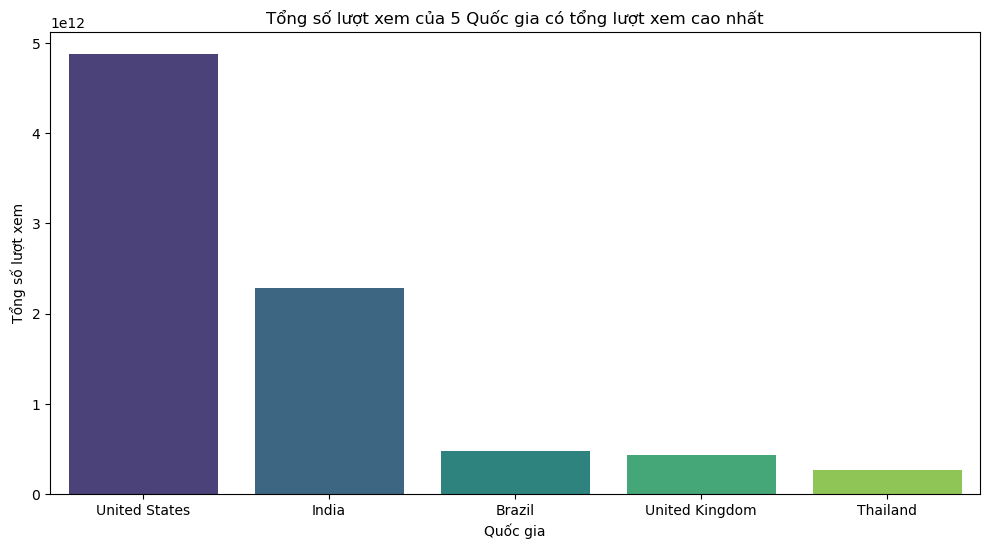

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='video views', data=top_countries, palette='viridis')
plt.title('Tổng số lượt xem của 5 Quốc gia có tổng lượt xem cao nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số lượt xem')
plt.show()

##### Bước 2: Tính phần trăm theo thể loại video cho từng quốc gia trong top 5

- Tạo DataFrame mới `top_countries_data` bằng cách lọc dữ liệu từ DataFrame gốc `data` thông qua phương thức isin(). 
- Sử dụng groupby để nhóm dữ liệu theo cột `Country` và `category`, tính tổng số lượt xem cho mỗi cặp quốc gia và thể loại video. Kết quả là một DataFrame mới `views_by_country_category` chứa thông tin về tổng số lượt xem theo quốc gia và thể loại.
- Tính phần trăm lượng xem cho mỗi thể loại video trong từng quốc gia. Sử dụng groupby và transform, nhóm dữ liệu theo 'Country', tính phần trăm cho mỗi dòng trong cột `video views` dựa trên tổng số lượt xem của quốc gia đó. Kết quả là một cột mới `percentage` chứa phần trăm cho mỗi dòng.

In [26]:
top_countries_data = data[data['Country'].isin(top_countries['Country'])]

views_by_country_category = top_countries_data.groupby(['Country', 'category'])['video views'].sum().reset_index()

views_by_country_category['percentage'] = views_by_country_category.groupby('Country')['video views'].transform(lambda x: x / x.sum() * 100)

DataFrame chứ thông tin về quốc gia, tổng lượt xem theo thể loại của từng quốc gia và phần trăm của từng thể loại ở quốc gia ấy

In [27]:
views_by_country_category

,Country,category,video views,percentage
0,Brazil,Autos & Vehicles,9597894786,1.994538
1,Brazil,Comedy,40300983515,8.374944
2,Brazil,Entertainment,86834906058,18.045155
3,Brazil,Film & Animation,62770223957,13.044275
4,Brazil,Gaming,39652691144,8.240223
5,Brazil,Howto & Style,7532881205,1.565407
6,Brazil,Music,182585917817,37.943166
7,Brazil,Nonprofits & Activism,3523578665,0.732235
8,Brazil,People & Blogs,39380287371,8.183614
9,Brazil,Sports,9029609749,1.876443


##### Bước 3: Vẽ biểu đồ trực quan

Biểu đồ tròn thể hiện phần trăm của từng thể loại trên từng quốc gia

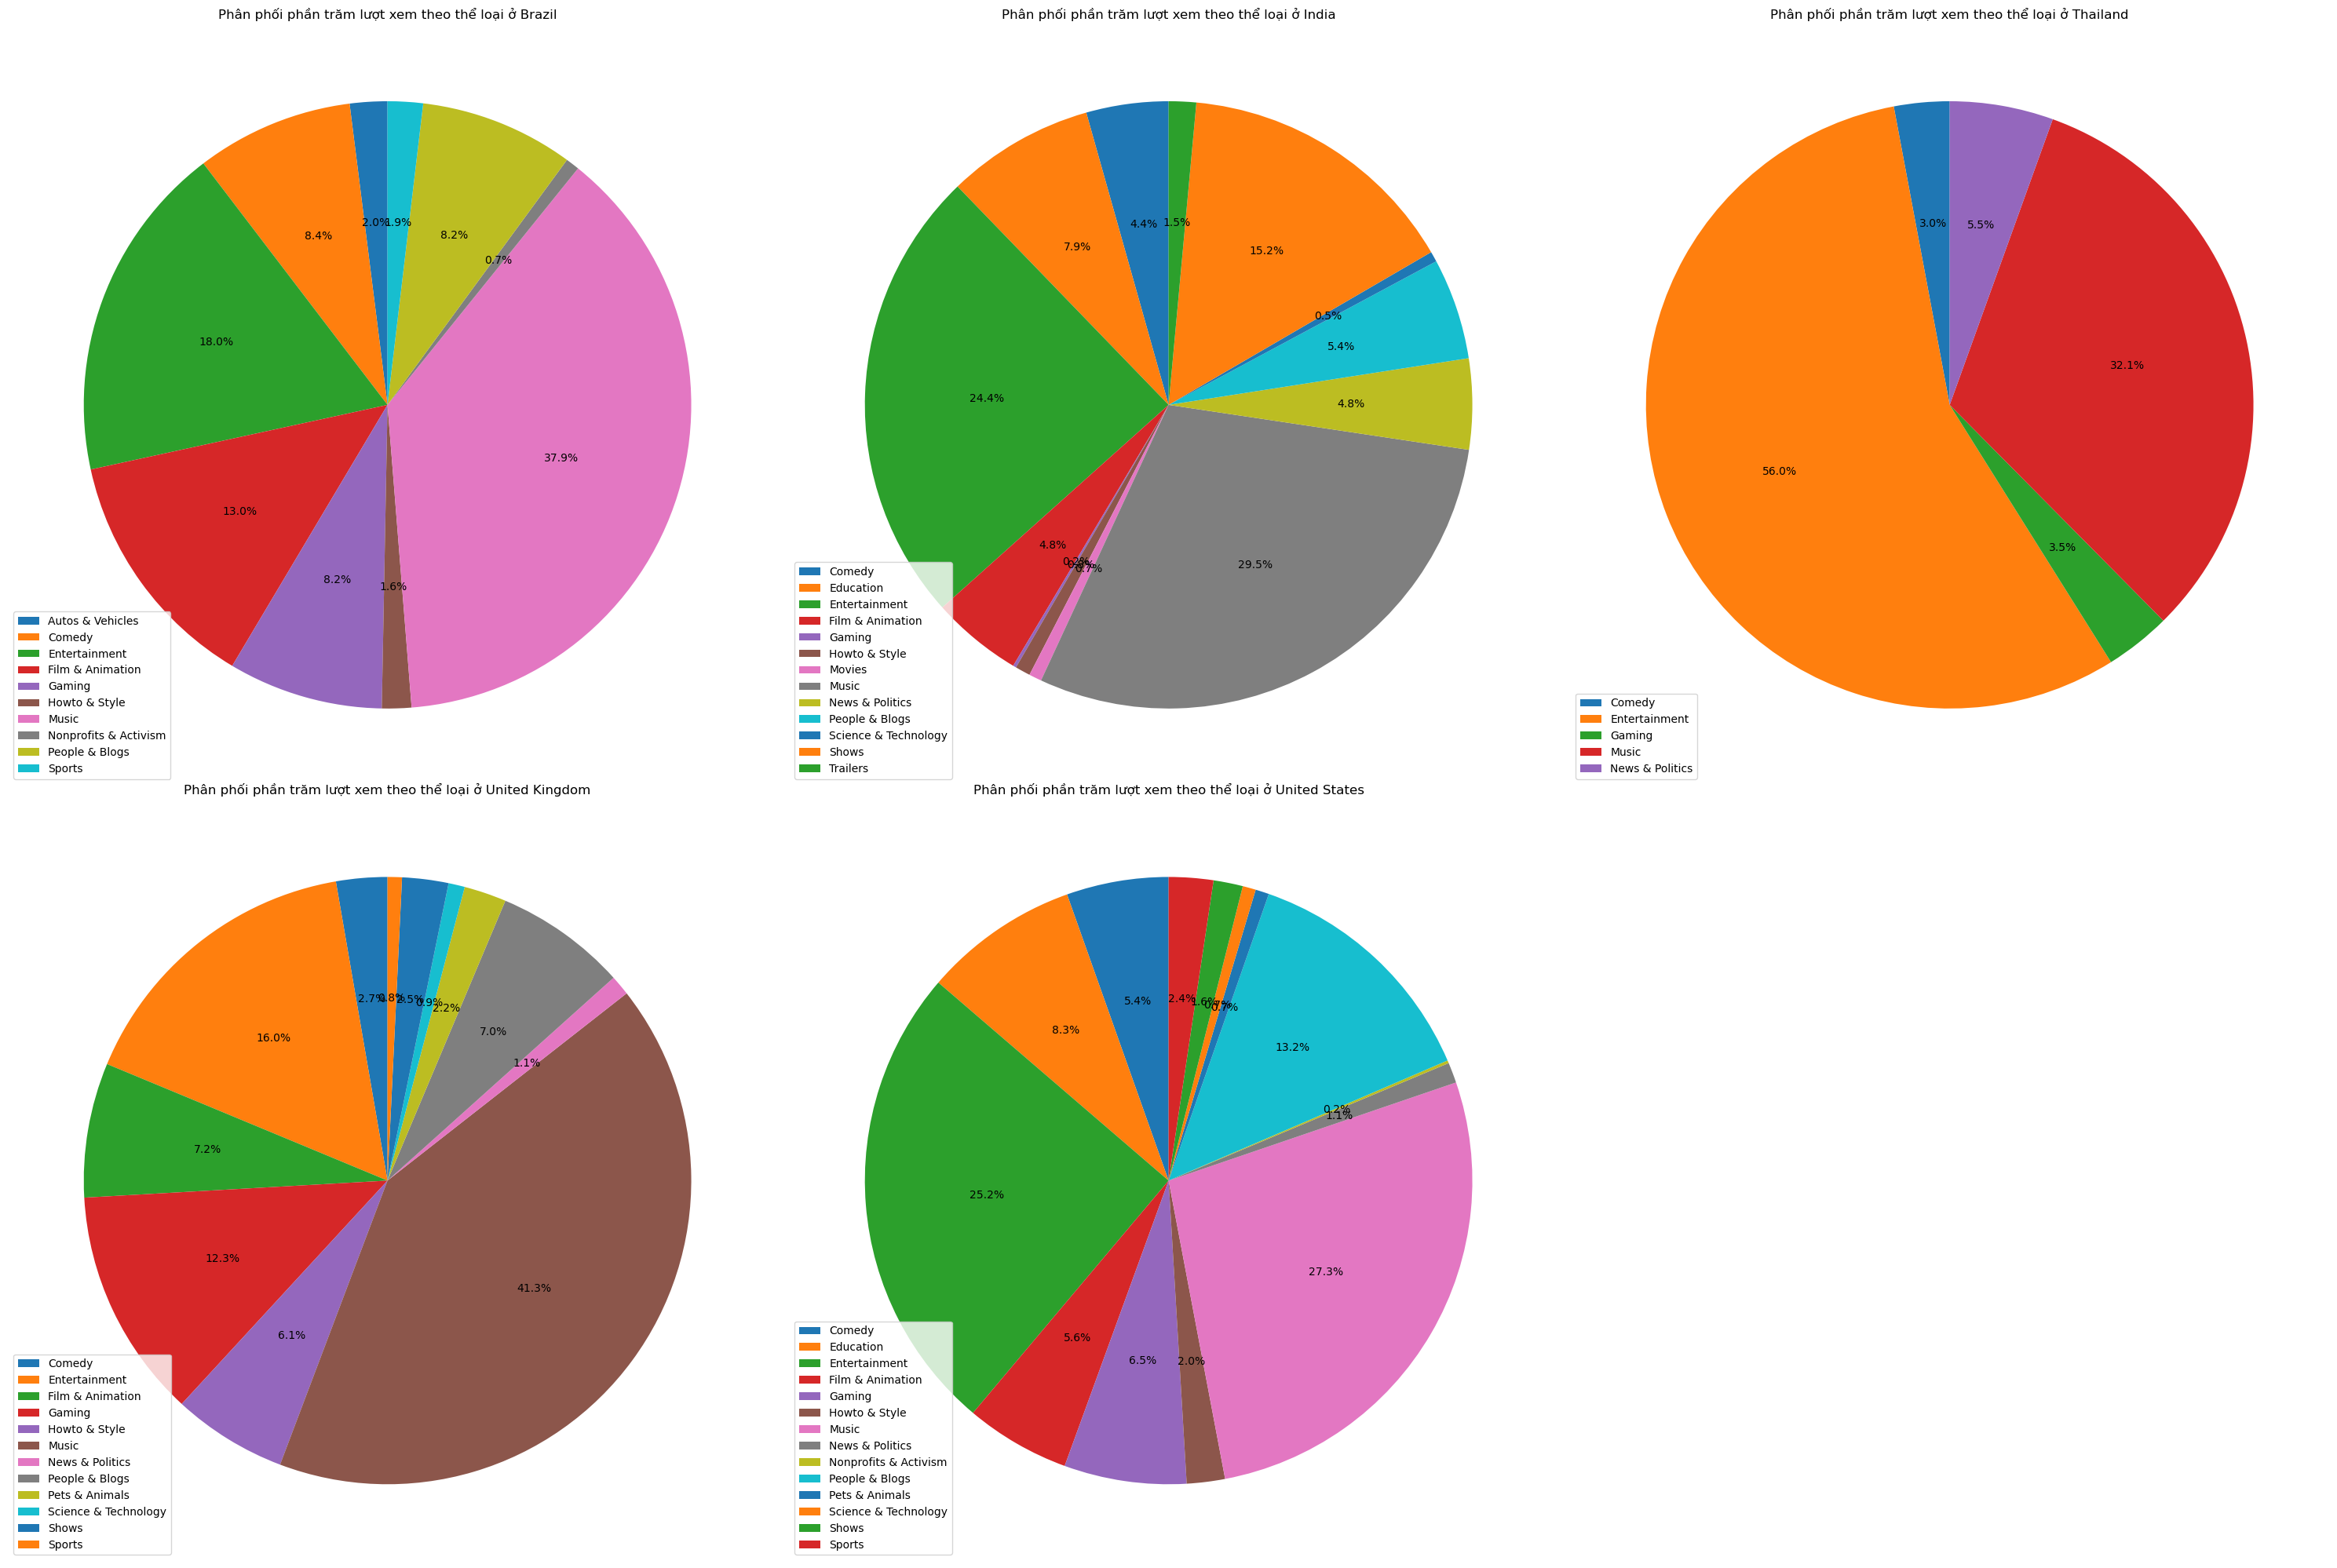

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.flatten()

for i, country in enumerate(views_by_country_category['Country'].unique()):
    data_country = views_by_country_category[views_by_country_category['Country'] == country]
    labels = data_country['category']
    data1 = data_country['percentage']
    wedges, texts, autotexts = axes[i].pie(data1, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Phân phối phần trăm lượt xem theo thể loại ở {country}')
    axes[i].legend(wedges, labels, bbox_to_anchor=(0.0, 0.0), loc='lower left')


for i in range(len(views_by_country_category['Country'].unique()), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

Biểu đồ cột thể hiện tổng lượt xem của từng thể loại trên từng quốc gia

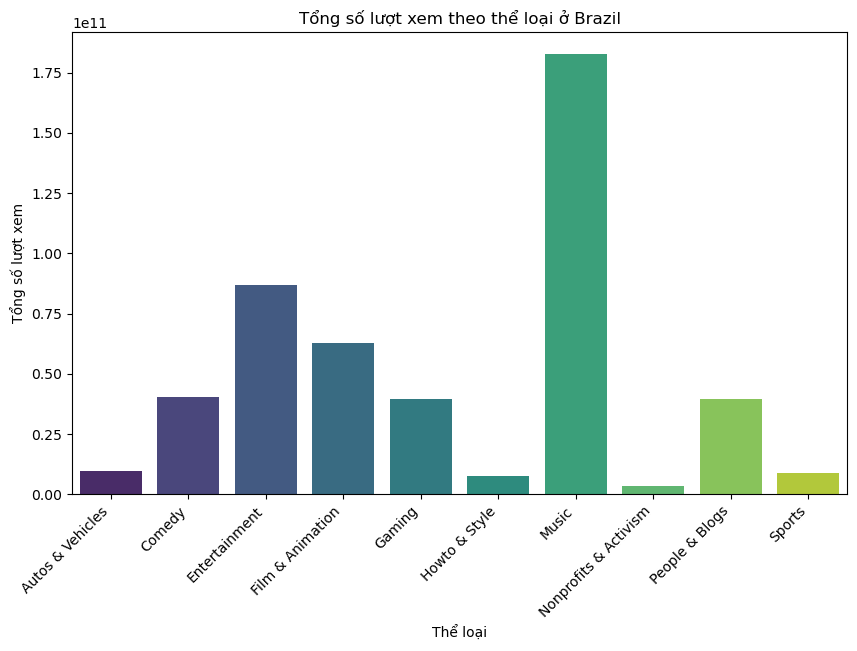

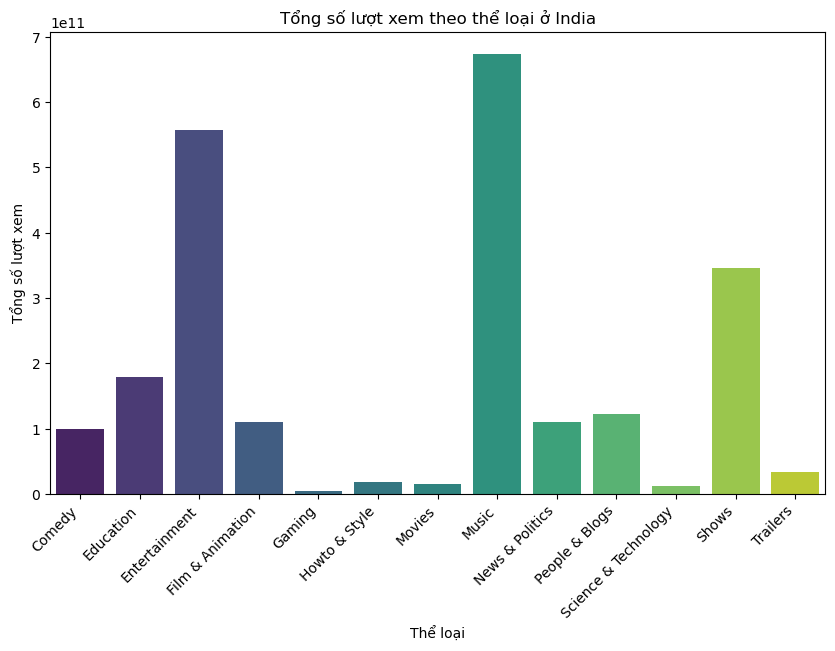

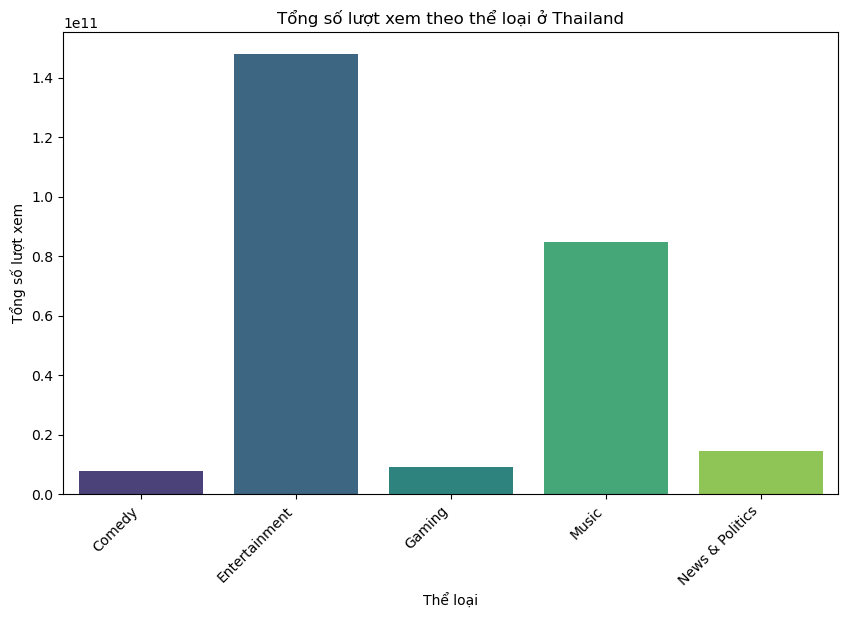

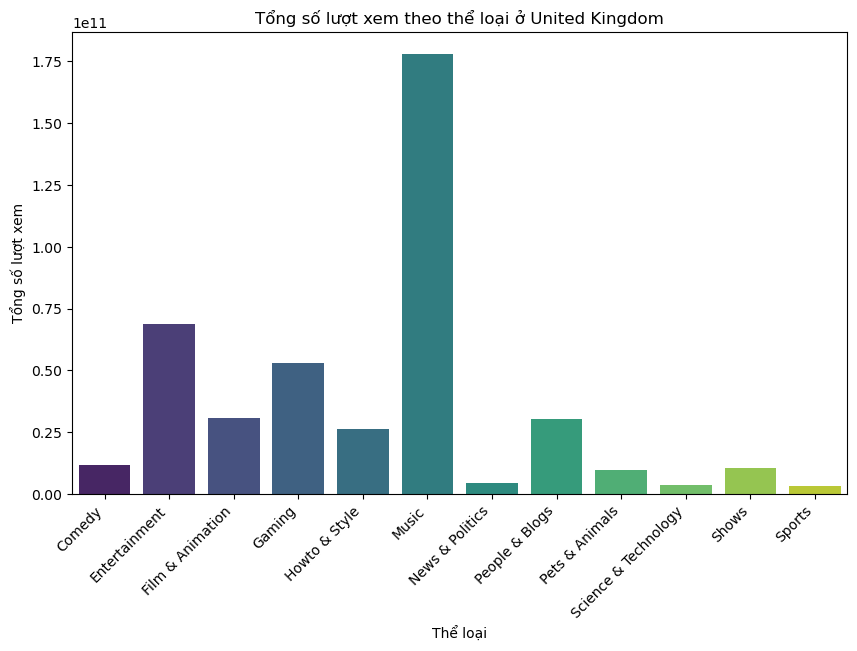

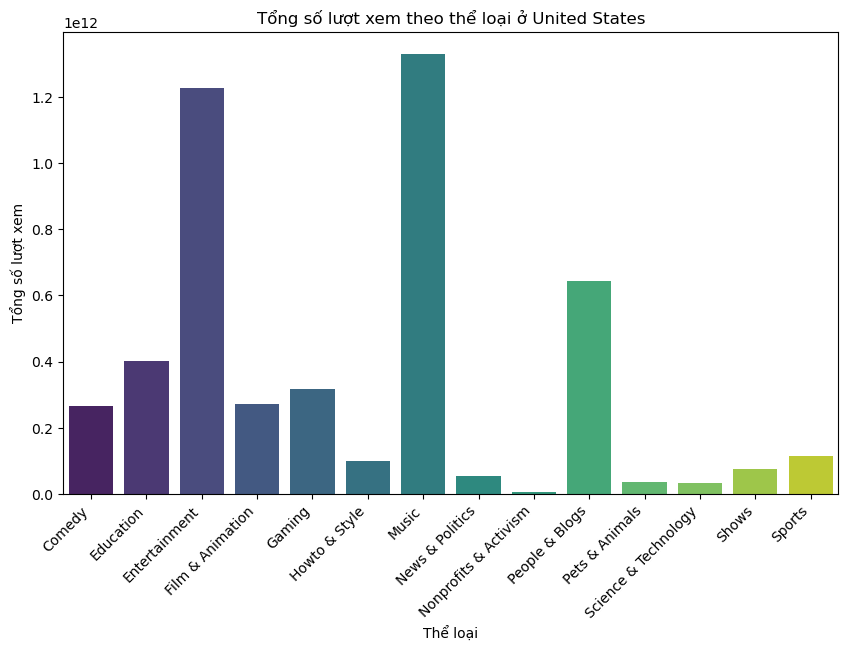

In [29]:
for country in views_by_country_category['Country'].unique():
    data_country = views_by_country_category[views_by_country_category['Country'] == country]

    plt.figure(figsize=(10, 6))
    sns.barplot(x='category', y='video views', data=data_country, palette='viridis')
    plt.title(f'Tổng số lượt xem theo thể loại ở {country}')
    plt.xlabel('Thể loại')
    plt.ylabel('Tổng số lượt xem')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    

#### 📚 Câu 2: Số lượt xem video được phân loại theo ngôn ngữ ở các quốc gia là như thế nào?

##### Bước 1: Tạo thêm cột `country language` vào DataFrame để lưu trữ thông tin về ngôn ngữ của quốc gia dựa trên thông tin về quốc gia được biểu diễn bằng viết tắt (Abbreviation) trong tập dữ liệu.

- Tạo dictionary để lưu trữ thông tin về ngôn ngữ của các quốc gia. Khóa của từ điển là viết tắt của quốc gia (Abbreviation), và giá trị là ngôn ngữ tương ứng.
- Lặp qua tất cả các giá trị duy nhất trong cột `Abbreviation` của DataFrame. 
- Tạo một chuỗi `country_identifier` bằng cách thêm tiền tố 'und_' vào viết tắt của quốc gia (Abbreviation) để định danh quốc gia theo ISO 639-2.
- Sử dụng thư viện `locale` để phân tích và lấy thông tin ngôn ngữ từ `country_identifier`. Kết quả là một chuỗi đại diện cho ngôn ngữ của quốc gia đó đươc lưu vào `country_language`.
- Lưu trữ thông tin ngôn ngữ vào từ điển 'countries_languages' với khóa là viết tắt của quốc gia (Abbreviation).

In [30]:
countries_languages = {}

for i in data['Abbreviation'].unique():
    country_identifier = 'und_'+i
    country_language = Locale.parse(country_identifier).language
    countries_languages[i] = country_language
    
data['country language'] = data['Abbreviation'].replace(countries_languages)

DataFrame sau khi đã thêm cột `country language`

In [31]:
data.sample(5)

,Youtuber,subscribers,video views,category,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,created_date,Population,Latitude,Longitude,country language
211,Alan Chikin Chow,26400000,27006526665,Comedy,865,United States,US,Comedy,61,63,...,4200000.00,3100000.00,50200000.00,2020,Feb,3,328239523,37.090240,-95.712891,en
408,SOMOY TV,19800000,12293479945,News & Politics,9930,United States,US,News,1291541,2251,...,65.00,49.00,779.00,2013,Nov,16,328239523,37.090240,-95.712891,en
972,Hero Movies 2023,12400000,1689090619,People & Blogs,689,United States,US,People,6116,51,...,87300.00,65500.00,1000000.00,2017,Feb,22,328239523,37.090240,-95.712891,en
27,T-Series Bhakti Sagar,61000000,29533230328,Music,13,India,IN,Music,4053938,5803,...,0.04,0.03,0.48,2018,Aug,3,1366417754,20.593684,78.962880,hi
858,Peet Montzingo,13400000,10022557589,People & Blogs,319,United States,US,People,433,165,...,1600000.00,1200000.00,19100000.00,2014,Jun,1,328239523,37.090240,-95.712891,en


##### Bước 2: Phân tích Tổng số lượt xem và Phần trăm lượt xem theo Ngôn ngữ

-  Sử dụng groupby để nhóm dữ liệu theo giá trị trong cột 'country language', chọn cột `video views `và tính tổng số lượt xem cho mỗi nhóm ngôn ngữ. Sắp xếp các nhóm ngôn ngữ theo tổng số lượt xem giảm dần. Đặt lại chỉ số của DataFrame để có dạng tăng dần, và lưu kết quả vào biến `views_per_language`.
-  Tính toán phần trăm lượt xem của từng ngôn ngữ bằng cách chia tổng số lượt xem của từng ngôn ngữ cho tổng số lượt xem của tất cả các ngôn ngữ. Kết quả được lưu vào cột mới có tên là `percentage`.

In [32]:
views_per_language = data.groupby(['country language'])['video views'].sum().sort_values(ascending = False).reset_index()
views_per_language['percentage'] = views_per_language['video views']/views_per_language['video views'].sum()

DataFrame mới `views_per_language` chứa thông tin về tổng số lượt xem và phần trăm lượt xem của từng ngôn ngữ.

In [33]:
views_per_language

,country language,video views,percentage
0,en,5624567566498,0.512053
1,hi,2281048375204,0.207664
2,es,758757319359,0.069076
3,pt,481208974267,0.043809
4,th,264317974741,0.024063
5,ar,243747130891,0.022190
6,ru,232996328527,0.021212
7,ko,225591685416,0.020538
8,id,151010669055,0.013748
9,fil,129128043889,0.011756


##### Bước 3: Vẽ biểu đồ trực quan  

Biểu đồ vùng thể hiện phần trăm lượt xem theo ngôn ngữ

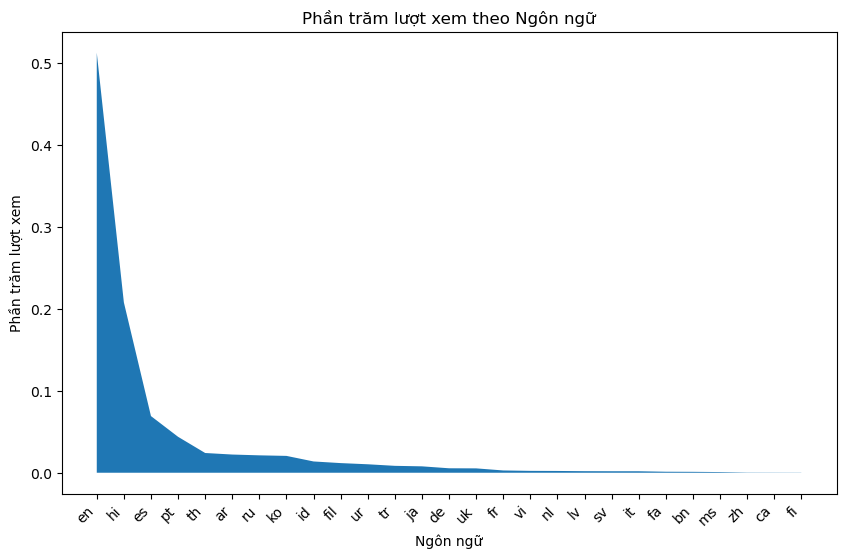

In [34]:
plt.figure(figsize=(10, 6))
plt.fill_between(views_per_language['country language'], views_per_language['percentage'])
plt.title('Phần trăm lượt xem theo Ngôn ngữ')
plt.xlabel('Ngôn ngữ')
plt.ylabel('Phần trăm lượt xem')
plt.xticks(rotation=45, ha='right')
plt.show()

Biểu đồ cột thể hiện tổng số lượt xem của 5 quốc gia cao nhất

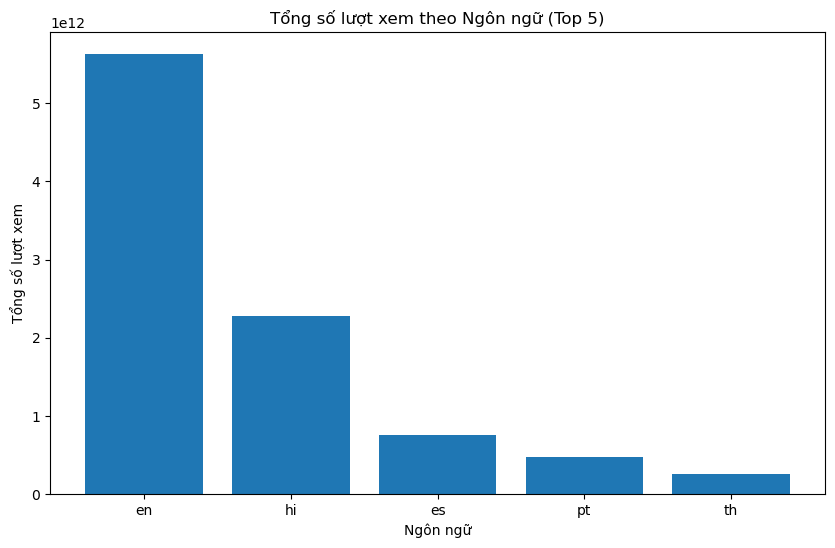

In [35]:
top_languages = data.groupby(['country language'])['video views'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(top_languages['country language'], top_languages['video views'])
plt.title('Tổng số lượt xem theo Ngôn ngữ (Top 5)')
plt.xlabel('Ngôn ngữ')
plt.ylabel('Tổng số lượt xem')
plt.show()

Có thể thấy, các quốc gia sử dụng ngôn ngữ `Anh (en)` là xem video nhiều nhất, tiếp đến là lần lượt các ngôn ngữ `Hin-ddi (hi)`, `Tây Ban Nha (es)`, `Bồ Đào Nha (pt)` và `Thái Lan (th)`. Dựa vào điều này, cần chú trọng làm video bằng tiếng Anh, hoặc có thêm phụ đề tiếng Anh để thu hút nhiều lượt xem hơn.

#### 📚 Câu 3: Thu nhập trung bình của từng thể loại video là như thế nào?

##### Bước 1: Tính thu nhập trung bình của 1 lượt xem trong từng thể loại

- Tính thu nhập trung bình hàng tháng `mean earnings` bằng cách lấy trung bình của `highest_monthly_earnings` và `lowest_monthly_earnings` 
- Tính thu nhập trung bình của 1 lượt xem `mean_earnings_per_view` bằng cách chia thu nhập trung bình hàng tháng `mean earnings` cho số lượt xem trong 30 ngày `video_views_for_the_last_30_days`.
- Sử dụng groupby để nhóm dữ liệu theo `category` và tính giá trị trung bình của `mean earnings per view` cho mỗi thể loại
- Lưu kết quả vào DataFrame `earnings_by_category` 

In [36]:
data['mean earnings'] = (data['highest_monthly_earnings']+data['lowest_monthly_earnings'])/2
data['mean earnings per view'] = data['mean earnings']/data['video_views_for_the_last_30_days']
earnings_by_category = data.groupby('category')['mean earnings per view'].mean().reset_index()
earnings_by_category = earnings_by_category.rename(columns={'mean earnings per view': 'average earnings per view'})

DataFrame mới `earnings_by_category` chứa thông tin về thu nhập trung bình của 1 lượt xem.

In [37]:
earnings_by_category

,category,average earnings per view
0,Autos & Vehicles,0.002116
1,Comedy,0.001846
2,Education,0.001988
3,Entertainment,0.001882
4,Film & Animation,0.001937
5,Gaming,0.001994
6,Howto & Style,0.001963
7,Movies,0.001062
8,Music,0.001976
9,News & Politics,0.002045


Trực quan bằng biểu đồ tròn để có cái nhìn tổng quan

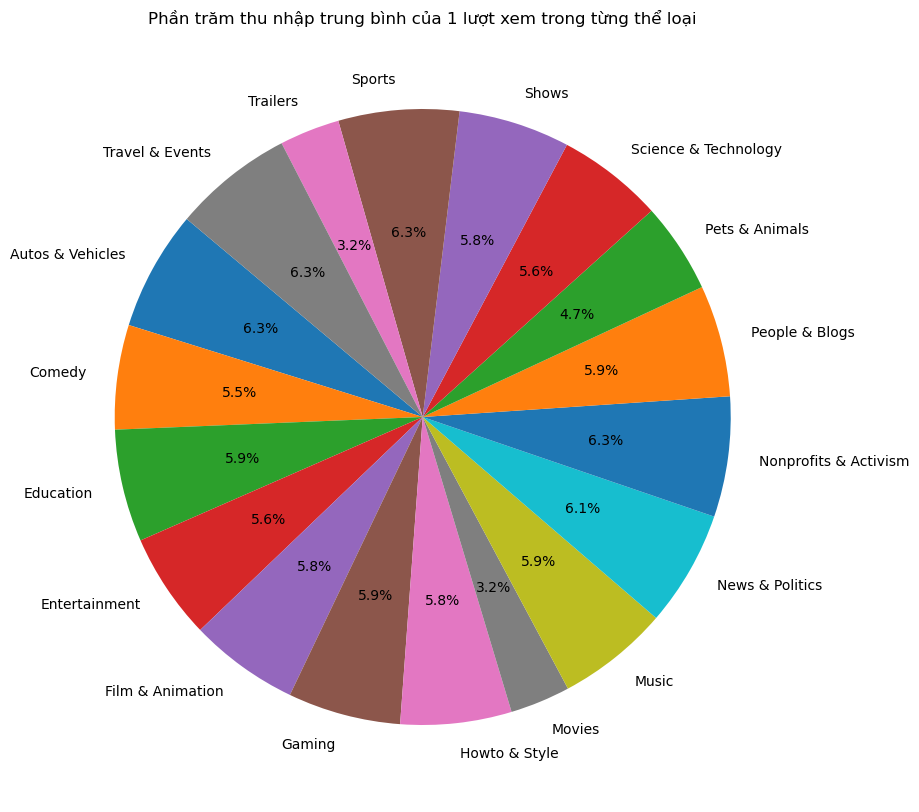

In [38]:
plt.figure(figsize=(10, 10))
plt.pie(earnings_by_category['average earnings per view'], labels=earnings_by_category['category'], autopct='%1.1f%%', startangle=140)
plt.title('Phần trăm thu nhập trung bình của 1 lượt xem trong từng thể loại')
plt.show()

##### Bước 2: Tính tổng thu nhập trung bình và tỷ lệ thu nhập tương đối của từng thể loại

- Sử dụng groupby để nhóm dữ liệu theo 'category', tính tổng thu nhập trung bình hằng tháng cho mỗi thể loại.
- Tính tỷ lệ thu nhập tương đối `relative earnings` bằng cách chia tổng thu nhập trung bình của từng thể loại cho tổng thu nhập trung bình của tất cả các thể loại. Kết quả là một cột mới chứa thông tin về tỷ lệ thu nhập tương đối của từng thể loại.
- Kết quả về tổng thu nhập trung bình và tỉ lệ thu nhập được lưu trong DataFrame `earnings_per_cat` 

In [39]:
earnings_per_cat = data.groupby(['category'])['mean earnings'].sum().reset_index().sort_values('mean earnings', ascending=False)
earnings_per_cat['relative earnings'] = earnings_per_cat['mean earnings'] / earnings_per_cat['mean earnings'].sum()

DataFrame `earnings_per_cat` chứa thông tin về tổng thu nhập trung bình từng thể loại và tỷ lệ thu nhập tương đối của từng thể loại, sắp xếp theo thứ tự giảm dần

In [40]:
earnings_per_cat

,category,mean earnings,relative earnings
3,Entertainment,1.037824e+08,0.332870
8,Music,5.927609e+07,0.190121
11,People & Blogs,3.834726e+07,0.122995
1,Comedy,2.450120e+07,0.078585
4,Film & Animation,1.790520e+07,0.057429
2,Education,1.661735e+07,0.053298
14,Shows,1.407005e+07,0.045128
5,Gaming,1.357658e+07,0.043545
9,News & Politics,8.876720e+06,0.028471
15,Sports,4.713500e+06,0.015118


##### Bước 3: Vẽ biểu đồ trực quan

Biểu đồ cột thể hiện tổng thu nhập trung bình của từng thể loại

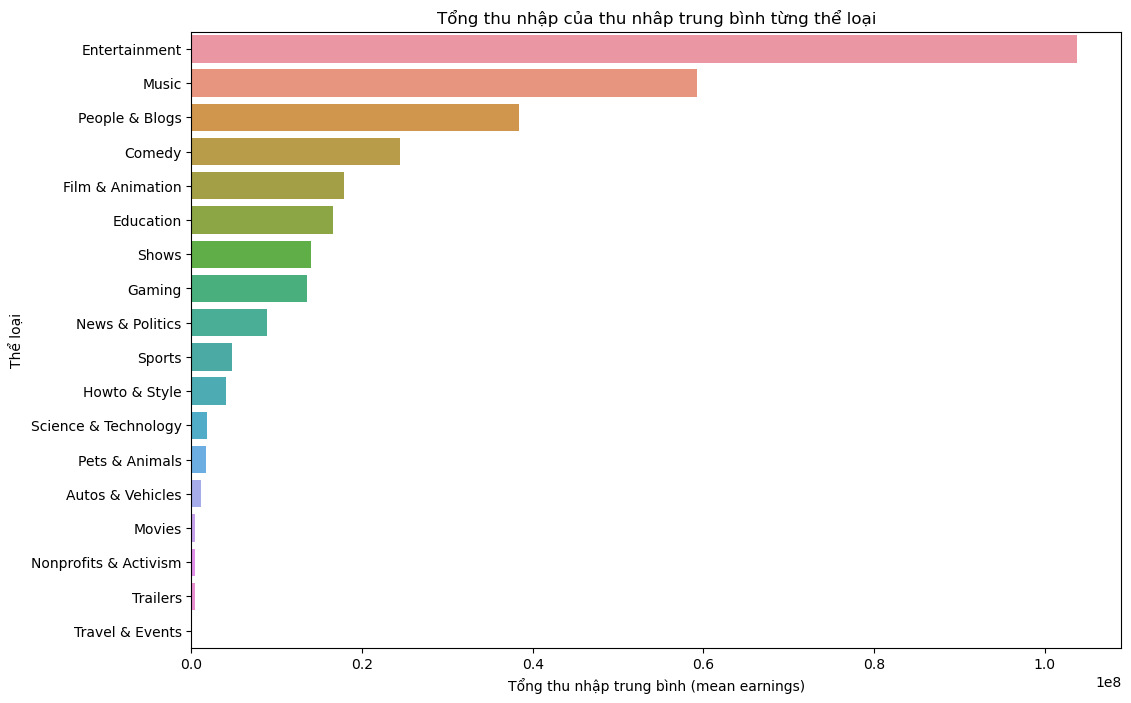

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x='mean earnings', y='category', data=earnings_per_cat)
plt.title('Tổng thu nhập của thu nhâp trung bình từng thể loại')
plt.xlabel('Tổng thu nhập trung bình (mean earnings)')
plt.ylabel('Thể loại')
plt.show()

Biểu đồ tròn thể hiện phần trăn tổng thu nhập tương đối của từng thể loại

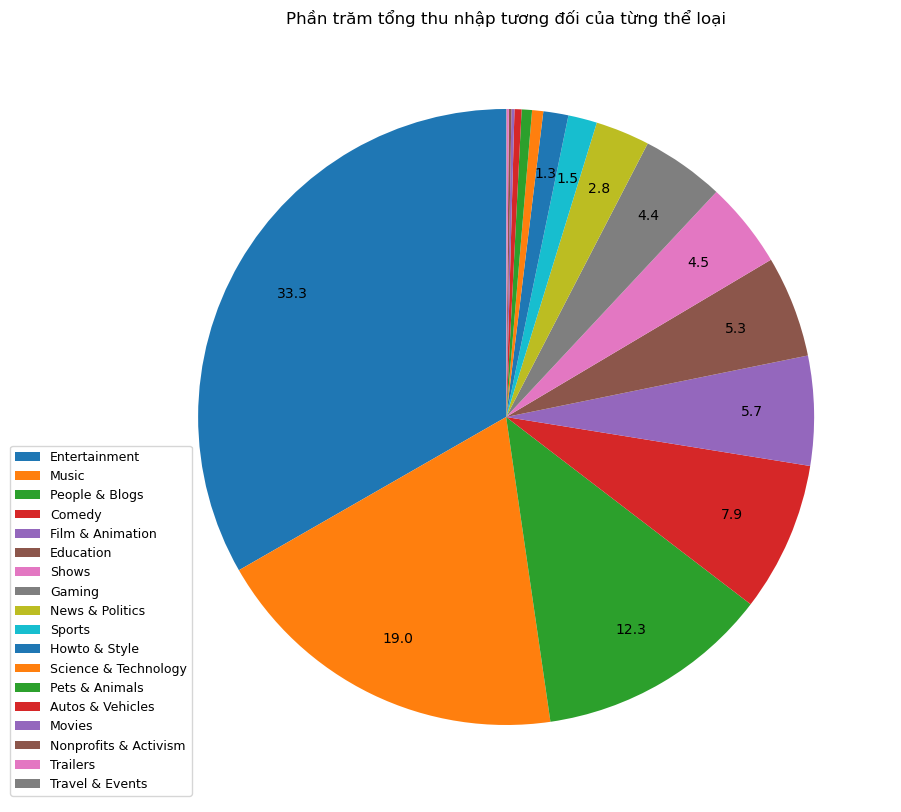

In [42]:
plt.figure(figsize=(30, 10))
plt.pie(earnings_per_cat['relative earnings'], autopct=lambda p: '{:.1f}'.format(p) if p > 1 else '', startangle=90, rotatelabels=True, pctdistance=0.8)
plt.legend(labels=earnings_per_cat['category'], prop={'size': 9}, loc="lower right", bbox_to_anchor=(0.1, 0))
plt.title('Phần trăm tổng thu nhập tương đối của từng thể loại')
plt.show()

### **5. Nhìn lại quá trình làm đồ án**

### **6. Tài liệu tham khảo**